In [12]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
from pyramid.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data = pd.read_csv('temperatures.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

 Data Types:
Date     object
Temp    float64
dtype: object


In [3]:
#This is to convert the date column in to a time series index.

con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
ts = data['Temp']
#check datatype of index
data.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [4]:
ts = data['Temp']

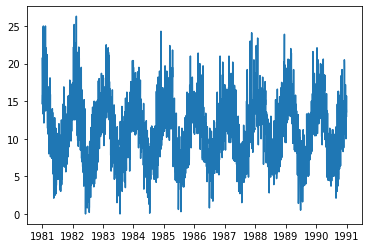

In [5]:
plt.plot(ts)

/home/chirag/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/chirag/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


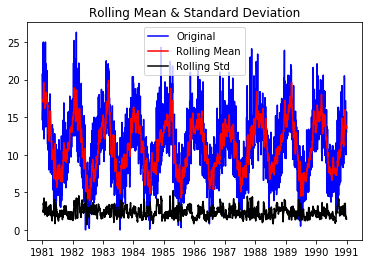

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [6]:
# Dickey Fuller test to test if our dataset is stationary or not

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    
    
test_stationarity(ts)

In [7]:
# We see that our test statistic score is lesser than the critical value scores. SO therefore our dataset 
#is stationary.

ts_log = np.log(ts)

/home/chirag/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


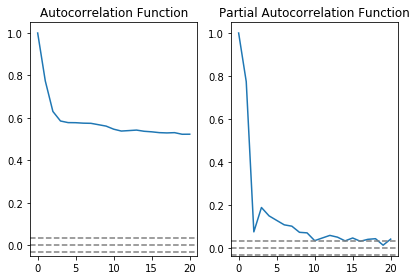

In [8]:
lag_acf = acf(ts, nlags = 20)
lag_pacf = pacf(ts , nlags = 20 , method = 'ols')

# This is for plotting ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0 , linestyle = '--' , color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts)) , linestyle = '--' , color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts)) , linestyle = '--' , color = 'gray')
plt.title("Autocorrelation Function")

# This is for plotting PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0 , linestyle = '--' , color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts)) , linestyle = '--' , color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts)) , linestyle = '--' , color = 'gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()

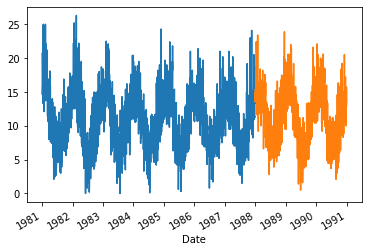

In [9]:
#divide into train and validation set
train = ts[:int(0.7*(len(ts)))]
valid = ts[int(0.7*(len(ts))):]

#preprocessing (since arima takes univariate series as input)
train.drop(columns = ['Date'],inplace=True)
valid.drop(columns = ['Date'],inplace=True)

#plotting the data
train.plot()
valid.plot()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=11861.100, BIC=11896.175, Fit time=4.359 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=14450.167, BIC=14461.858, Fit time=0.117 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=12191.269, BIC=12208.807, Fit time=0.242 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=13045.407, BIC=13062.944, Fit time=0.287 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=11885.617, BIC=11914.846, Fit time=1.527 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=11860.831, BIC=11901.752, Fit time=3.061 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=11858.835, BIC=11893.910, Fit time=2.498 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=12179.821, BIC=12203.205, Fit time=0.435 seconds
Fit ARIMA: order=(4, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=11862.765, BIC=11909.531, Fit time=4.666 seconds
Fit ARIMA: order=(2

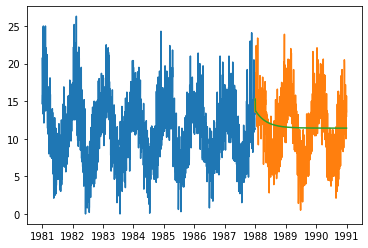

In [10]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [11]:
rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

3.915293839270543


In [ ]:
# In the above code, we simply used the .fit() command to fit the model without having to select the combination 
# of p, q, d. But how did the model figure out the best combination of these parameters? Auto ARIMA takes into 
# account the AIC and BIC values generated (as you can see in the code) to determine the best combination of 
# parameters. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are estimators 
# to compare models. The lower these values, the better is the model.